# 2. Gyakorlat: Gradiens ereszkedés - Logsztikus függvény illesztése
Ez a demonstráció nagyon hasonló az előző órán látottakhoz. Megfigyelhetjük, hogyan illeszt a gradiens ereszkedő egy logisztikus függvény egy adathalmazra

In [1]:
# Könyvtárak
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 1000}) # Ezzel óvatosan

## Adatok generálása
Ezek véletlen adatok lesznek, a valóságban ilyenekre ne számítsunk! 

In [3]:
X = np.array(np.linspace(0, 10, 100))

y = []
for i in range(len(X)):
    if (X[i] < 5):
        y.append(0)
    else:
        y.append(1)
        
y = np.array(y)

## Adatok ábrázolása 

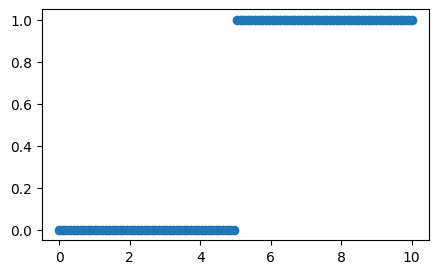

In [4]:
plt.figure(figsize=(5, 3))
plt.scatter(X, y)
plt.show()

## Együtthatók kezdeti értéke

In [7]:
b0 = 0  # y tengely metszéspontja
b1 = 0  # Meredekség
alpha = 0.001  # Tanulási sebesség

## Függvény definiálása

In [8]:
def sigmoid(b0, b1, x):  # Logisztikus szigmoid függvény
    return 1/(1 + np.exp((-1)*(b0 + b1*x)))

P = sigmoid(b0, b1, X)

## Függvény Ábrázolása

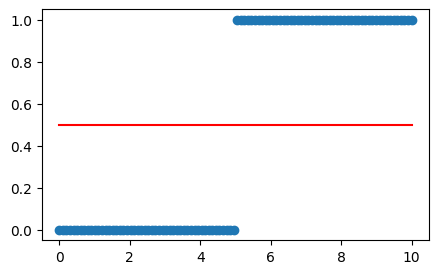

In [9]:
plt.figure(figsize=(5, 3))
plt.scatter(X, y)
plt.plot(X, P, color='red')
plt.show()

## Kezdeti Hiba értéke

In [10]:
np.sum(-y*np.log(P) - (1-y)*np.log(1-P))

69.31471805599453

## Értékek közelítése 1 iterációval

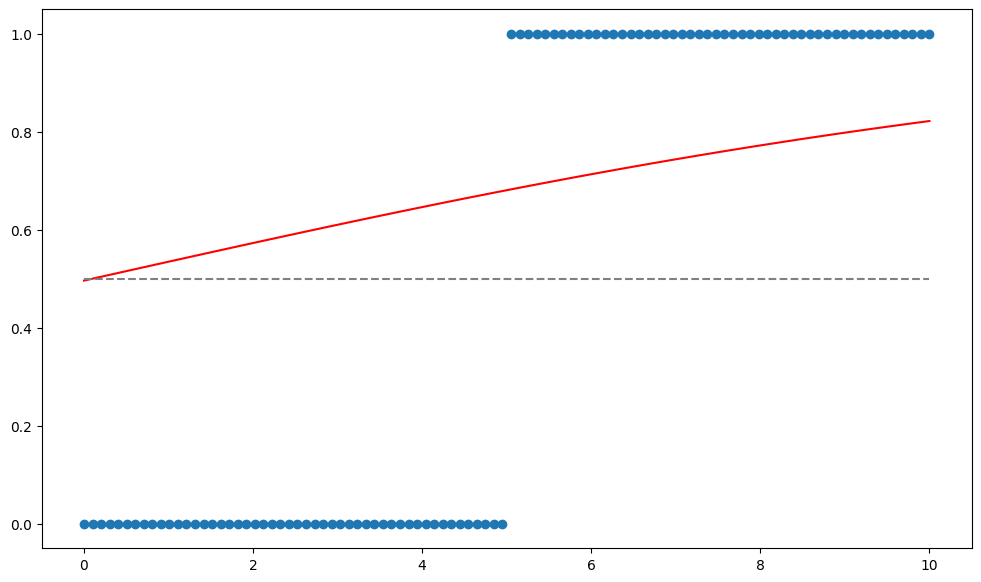

In [12]:
#együtthatók újraszámolása
b0 = b0 - np.sum(P - y)*alpha
b1 = b1 - np.sum((P - y)*X)*alpha

#sigmoid függvény újraszámolása
P = sigmoid(b0, b1, X)

def plot_log():
    plt.figure(figsize=(12, 7))                         #méret
    plt.scatter(X, y)                                   #adat pontok
    plt.plot(X, P, color='red')                         #sigmoid függvény
    plt.plot(X, X*0+0.5, color='grey', linestyle='--')  #szürke szaggatott vonal p=0,5-höz
    plt.show()

plot_log()

## Értékek közelítése tetszőleges számú iterációval
Próbáljuk meg átírni az iter_n változót, és figyeljük meg, mi történik!

In [13]:
b0 = 0
b1 = 0
alpha = 0.001

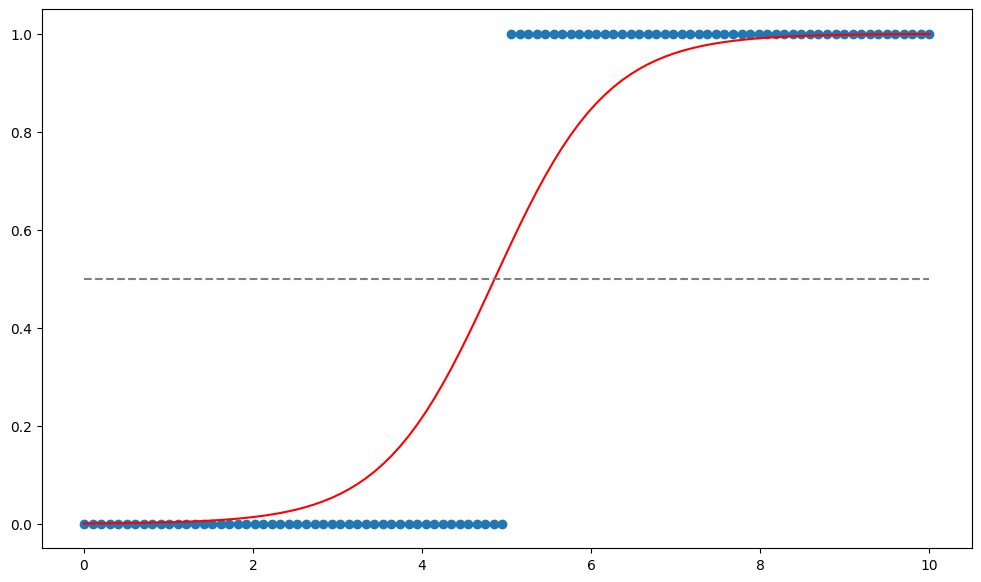

összes hiba nagysága:  11.019312668525435


In [15]:
iter_n = 1000
for i in range(iter_n):
    b0 = b0 - np.sum(P - y)*alpha
    b1 = b1 - np.sum((P - y)*X)*alpha
    P = 1/(1 + np.exp((-1)*(b0 + b1*X)))

plot_log()
    
print('összes hiba nagysága: ', np.sum(-y*np.log(P) - (1-y)*np.log(1-P)))